In [3]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

!pip install keras
!pip show keras
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [4]:
!pip install google-auth
import google.auth
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
def extract_mfcc(wav_file_name):
  y,sr=librosa.load(wav_file_name)
  mfccs=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)

  return mfccs


In [6]:
import os
ravdess_speech_labels=[]
ravdess_speech_data=[]
for dirname, _,filenames in os.walk('/content/drive/My Drive/Ravdess/'):
  for filename in filenames:
    ravdess_speech_labels.append(int(filename[7:8])-1)
    wav_file_name=os.path.join(dirname,filename)
    ravdess_speech_data.append(extract_mfcc(wav_file_name))

print("Finished")

Finished


In [7]:
ravdess_speech_data

[array([-7.1635339e+02,  3.5547619e+01, -6.0226822e+00,  7.9422688e+00,
        -6.1502590e+00, -6.9712567e+00, -7.0630217e+00, -1.1555155e+01,
        -4.8777719e+00, -4.6736693e+00, -2.1677942e+00, -6.6348276e+00,
        -4.3071809e+00, -2.3838346e+00, -6.3300233e+00, -5.2437921e+00,
        -4.1624079e+00, -3.1248124e+00, -4.1112938e+00, -3.4004228e+00,
        -3.5823438e+00, -1.8261735e+00, -3.1796792e+00,  2.1374850e+00,
         7.9927707e-01,  1.5574312e+00,  8.1499970e-01,  4.0056100e-01,
        -3.5249951e-01,  1.6734822e+00,  1.6530992e+00,  3.3280256e+00,
         1.6256377e+00,  2.6842797e+00,  1.8317868e+00,  3.7657292e+00,
         1.6044767e+00,  1.8759145e+00, -1.8490535e+00, -4.9551505e-01],
       dtype=float32),
 array([-7.0614124e+02,  3.5002117e+01, -7.6716881e+00,  9.3586807e+00,
        -6.6919675e+00, -9.4269218e+00, -6.4378052e+00, -1.2181662e+01,
        -5.5207767e+00, -4.0778794e+00, -5.0065665e+00, -4.8960581e+00,
        -5.7605376e+00, -5.6187242e-01, 

In [8]:
ravdess_speech_data_array=np.array(ravdess_speech_data)
ravdess_speech_label_array=np.array(ravdess_speech_labels)
ravdess_speech_label_array.shape

labels_categorical=to_categorical(ravdess_speech_label_array)
labels_categorical.shape

(2880, 8)

In [9]:
ravdess_speech_data_array

array([[-7.1635339e+02,  3.5547619e+01, -6.0226822e+00, ...,
         1.8759145e+00, -1.8490535e+00, -4.9551505e-01],
       [-7.0614124e+02,  3.5002117e+01, -7.6716881e+00, ...,
        -1.0021755e+00, -2.5400648e+00,  4.9551600e-01],
       [-8.0710645e+02,  4.1267151e+01,  2.3186641e+00, ...,
         2.2264962e+00,  7.6606333e-01,  3.8141344e+00],
       ...,
       [-6.0522461e+02,  5.1048885e+01, -5.4272108e+00, ...,
         3.2384373e-02, -2.1314406e+00, -7.4637967e-01],
       [-6.6640350e+02,  4.9284126e+01, -1.8099375e+00, ...,
         2.9971318e-02, -2.7273772e+00, -9.8507506e-01],
       [-5.5319366e+02,  4.1932568e+01, -5.2114601e+00, ...,
        -6.6592187e-01, -1.4736134e+00, -1.0706234e+00]], dtype=float32)

In [10]:
ravdess_speech_data_array.shape

(2880, 40)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(np.array(ravdess_speech_data_array),labels_categorical,test_size=0.20,random_state=9)

In [13]:
number_of_samples=ravdess_speech_data_array.shape[0]
training_samples=int(number_of_samples*0.8)
validation_samples=int(number_of_samples*0.1)
test_samples=int(number_of_samples*0.1)

In [20]:
def create_model_LSTM():
  model=Sequential()
  model.add(LSTM(128,return_sequences=False,input_shape=(40,1)))
  model.add(Dense(64))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(32))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(8))
  model.add(Activation('softmax'))

  model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
  return model


In [16]:
w=np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [17]:
w.shape

(2304, 40, 1)

In [21]:
model_A=create_model_LSTM()
history=model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1),labels_categorical[:training_samples],validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples],-1),labels_categorical[training_samples:training_samples+validation_samples]),epochs=130,shuffle=True)

Epoch 1/130
72/72 [==============================] - 8s 80ms/step - loss: 2.0697 - accuracy: 0.1576 - val_loss: 2.0472 - val_accuracy: 0.1667
Epoch 2/130
72/72 [==============================] - 3s 46ms/step - loss: 2.0032 - accuracy: 0.2131 - val_loss: 1.9573 - val_accuracy: 0.2257
Epoch 3/130
72/72 [==============================] - 3s 46ms/step - loss: 1.9423 - accuracy: 0.2374 - val_loss: 1.9243 - val_accuracy: 0.2743
Epoch 4/130
72/72 [==============================] - 3s 47ms/step - loss: 1.8994 - accuracy: 0.2652 - val_loss: 1.9174 - val_accuracy: 0.2396
Epoch 5/130
72/72 [==============================] - 8s 108ms/step - loss: 1.8760 - accuracy: 0.2665 - val_loss: 1.9109 - val_accuracy: 0.2674
Epoch 6/130
72/72 [==============================] - 9s 123ms/step - loss: 1.8638 - accuracy: 0.2721 - val_loss: 1.8585 - val_accuracy: 0.3299
Epoch 7/130
72/72 [==============================] - 7s 99ms/step - loss: 1.8351 - accuracy: 0.2886 - val_loss: 1.8458 - val_accuracy: 0.2882
Epoc

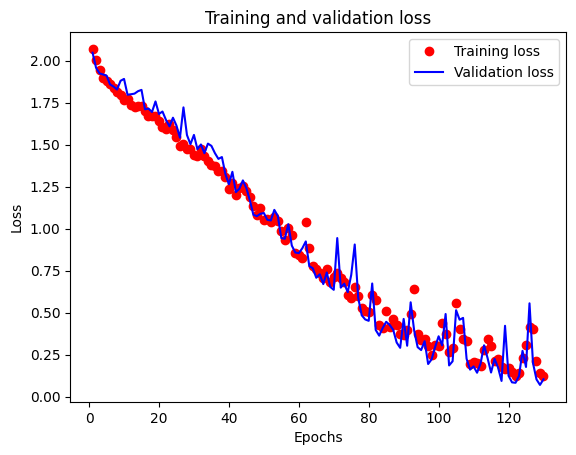

In [22]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

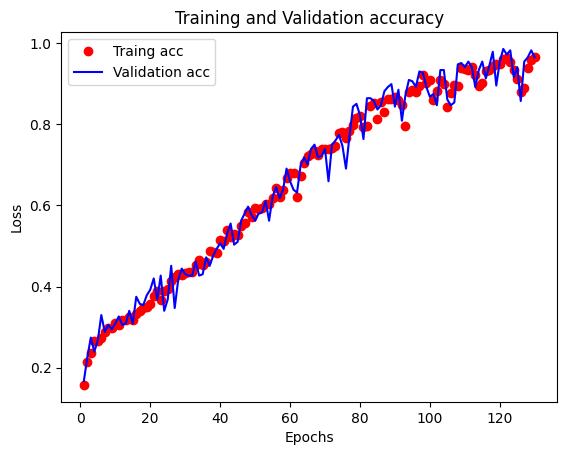

In [23]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc,'ro',label='Traing acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()

plt.show()

In [25]:
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples+validation_samples:],-1),labels_categorical[training_samples+validation_samples:])

9/9 [==============================] - 0s 23ms/step - loss: 0.0825 - accuracy: 0.9826


[0.082515187561512, 0.9826388955116272]

In [26]:
emotions={1:'neutral',2:'calm',3:'happy',4:'sad',5:'angry',6:'fearful',7:'disgust',8:'surprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [27]:
predict('/content/drive/My Drive/Ravdess/Actor_02/03-01-01-01-01-01-02.wav')

1/1 [==============================] - 1s 533ms/step
neutral


In [28]:
predict('/content/drive/My Drive/Ravdess/Actor_02/03-01-08-01-01-01-02.wav')

1/1 [==============================] - 0s 63ms/step
surprised


In [29]:
predict('/content/drive/My Drive/Ravdess/Actor_02/03-01-03-01-01-01-02.wav')

1/1 [==============================] - 0s 65ms/step
happy


In [1]:
model_A.save('mymodel.h5')
modelc=tf.keras.models.load_model('mymodel.h5')

NameError: name 'model_A' is not defined